<a href="https://colab.research.google.com/github/NonMundaneDev/Data_Science_Nigeria_2018/blob/main/Data_Science_Nigeria_Original_(Stephen_Oladele).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our helper libraries
# Pandas will be used to load up our data and also for our 'data crunching'
# Numpy will be used for our number crunching
# matplotlib will be used for our visualization
# We might also use tensorflow, so we should import it (you can ignore this library if you don't have a good computational power, we might not need it)


import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


%matplotlib inline  
# The above line of code sets Jupyter as the backend for the plots from matplotlib. 

C:\Users\PC\Anaconda3\envs\tfp3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# Here will we use pandas to read in our data. You should have downloaded 'train.csv' and 'test.csv', I believe.
# The 'read_csv' function is used to import csv files into pandas (for this to work, make sure your data is in the same
# folder as your project (if you are using Jupyter notebook)

train_set = pd.read_csv("train.csv")

In [ ]:
# Check the first 5 rows of your data with the `.head()` function from the Pandas library
# It is a good idea to have a domain knowledge of your data for appropriate data cleaning

train_set.head()

In [ ]:
# Here we are importing the test data set
test_set = pd.read_csv("test.csv")

In [ ]:
# The below codes are assigning creating new cols and assigning the strings on the right to the new column.

train_set['original_entry']='training_data'
test_set['original_entry']='test_data'

In [ ]:
# We can now join both sets togther using Pandas conccatenate (means joining) with `.concat()` function

supermarket_data = pd.concat([train_set, test_set],ignore_index=True, sort = False)

After reading in and undertstanding your domain problem, you can now check for missing values using `.isnull()` function
and adding up all missing values for clearer analysis with `.sum()` function.

In [ ]:
supermarket_data.isnull().sum()

In [ ]:
supermarket_data.describe()

1. First of all we need to know what cat columns will be useful for us.
2. For our prouct_identifier will be very useful, Supermarket_Identifier will also be useful

3. Also our X(Product_Supermarket_Identifier)  for the final submission, will be quite useful.

4. While cleaning our data, we will group our product_type and 'one-hot encode it', basically turn it into a...
 ... vector that our model can read
5. Other features we will one-hot encode include Supermarket_Location_Type, Supermarket _Size, Supermarket _Type
6. Also since there is a reasonable amount of groupoing for Product _Fat_Content, we can also group into...
... dictionary keys, that we will later encode too.
Bear in mind, that Product _Fat_Content is not a feature that will help us a lot. So we will drop it later

Filter categorical variables

We will use list comprehension method (for joining conditional statements and a for loop together in a list)

The below line simply states that, for x in our data (read the data types), if any feature has 'object' as its
datatype, assign that feature to x (which is a list) --> therefore our list (categorical_features) 
will be features that have datatype 'object'

In [ ]:
cat_cols = [x for x in supermarket_data.dtypes.index if supermarket_data.dtypes[x]=='object']

We are doing this so we can work with our identifier columns as non-categorical across our code
and also our 'original_entry' columns, because they are identifier columns ('training_set' and 'test_set'), and they..
... don't really have much to do with the code.

For our new list (features with datatype object) in categorcial_features, exclude all features that are...
...['original_entry', 'Product_Identifier','Supermarket_Identifier', 'Product_Supermarket_Identifier'] from categorical_features

In [ ]:
cat_cols = [x for x in cat_cols if x not in ['original_entry', 'Product_Identifier','Supermarket_Identifier', 'Product_Supermarket_Identifier']]

# Use a for loop to iterate through the list, in cat_cols (that is, our categorical columns)
for col in cat_cols:
    print('\n')   # Print new line
    print('Frequency of Categories for varible {}'.format(col)) # Print the frequency of occurence for categories in each
                                                                # ... new categorical column -- > as a string
    print(supermarket_data[col].value_counts())  # The actual 'frequency of occurence' line of code, using 'value_counts()' function
    



Frequency of Categories for varible Product_Fat_Content
Low Fat          5200
Normal Fat       3006
Ultra Low fat     316
Name: Product_Fat_Content, dtype: int64


Frequency of Categories for varible Product_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 909
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Product_Type, dtype: int64


Frequency of Categories for varible Supermarket _Size
Medium    2793
Small     2388
High       932
Name: Supermarket _Size, dtype: int64


Frequency of Categories for varible Supermarket_Location_Type
Cluster 3    3349
Cluster 2    2785
Cluster 1    2388
Name: Supermark

In [ ]:
# Visualize your continous (numeric) data with matplotlib in an histogram using a histogram plot

supermarket_data.hist(bins=20, figsize = (20, 16));

Now that doesn't make too much sense, right? Now let's visualize the data correlation with the '.corr()' function


In [ ]:
supermarket_data.corr()



As we will see from the output, there is a correlation between 'Product_Price' and 'Product_Supermarket_Sales'
An increase in product price leads to an increase in the supermarket sales. Interesting!

In [ ]:
# Let's make a plot to visualize the correlation between product price and supermarket price.
supermarket_data.plot(kind='scatter', x='Product_Price', y='Product_Supermarket_Sales')

Rememeber those missing values? Yeah! Let's check 'em out, shall we.

In [ ]:
supermarket_data.isnull().sum()

From our output, we should see that we have numerous missing values in 'Product_Weight' and 'Supermarket _Size' columns
You can ignore the missing values in 'Product_Supermarket_Sales', these are from our test set, where we drop our label.

In [ ]:
# So we have seen the missing values, yeah? Let's deal with them one at a time.

First off, our 'Product_Weight'!
If you check the table, you will see that 'Product_Weight' is a continous value (numeric), so it will be reasonable enough...
... to fill all missing values with the mean of 'Product_Weight', like every other project, right? Ehm... there is a problem
The missing values are quite much, if we fill it in with the mean of the coulmn, then we wil have too much of a similar value...
... which isn't good for our data, and of course for our analysis.

So one way we can use a rather more 'distributed' mean is to group our 'Product_Weight' cplumn with respect to a distrubted...
... category in 'Product_Identifier', so we can have a more distubuted average across the missing 'Product_Weight' column

In [ ]:
# We can use the line of code below to group the two columns together and find the mean (average) of each category

product_wt_average =supermarket_data.groupby('Product_Identifier')['Product_Weight'].mean()

Now of course, we do not have missing values in all of our 'Product_Weight' column, so we need to specify where our...
... computed average will go

Well, one of the many ways we can do this is to 'fill' all the missing values with something. So we will use that thing...
... to exempt missing values from actual values. Observe...


In [ ]:

supermarket_data.Product_Weight.fillna('Missing', inplace = True)

# `.fillna()` function essentially does the opposite of `.dropna()` function. That is, it fils the null data, or missing values with
# ... the provided argument. 'inplace = True', states that it shouls be implemented in the data across every cell.

This cell of code uses a for loop to iterartes over the rows (using `.iterrows()` function) in our data set with labels 'col' and 'row'
The conditional statments says that during iteration over Product_Weight rows, if we see 'Missing'
... assign product_wt_average from each Product_Identifier row to the Product_Weight column
We achieve this using the '.loc[]' function of course.

In [ ]:
for col, row in supermarket_data.iterrows():
    if(row.Product_Weight == 'Missing'):
        supermarket_data.loc[col, 'Product_Weight'] = product_wt_average[row.Product_Identifier]
        

# Print the number of missing values now.        
print ('Final missing values are {} in number.'.format(sum(supermarket_data['Product_Weight'].isnull())))

Final missing values are 4 in number.


In [ ]:
# As we can see, we still have 4 missing values, so we can manually fill them in with perhaps the mean of our column Product_Weight

supermarket_data.Product_Weight.fillna(supermarket_data.Product_Weight.mean(), inplace = True)

# Now print final missing values...
print ('Final missing values are {} in number.'.format(sum(supermarket_data['Product_Weight'].isnull())))

Final missing values are 0 in number.


So yes! We have cleaned up that data section of ours. Now lets move on to the next missing value 'Supermarket _Size'!

Understanding the data
First step to understanding our data is to know the domain problem, yeah?
But after understanding the domain problem, we can move on to the data itsef, its columns.

First step to understanding the columns is to know what type of columns we are dealing with. Whether continous (numeric) or...
... categorical columns (with non-numeric data types like strings, objects)

After glancing through your data for confirmation, you can proceed... If its a numeric column, you'll deal with it as is.
If it is a categorical column,  you will confirm if there is one or multiple categories in the column. If there is just one, 
... you'll deal with it as is. If there are multiple [categories], you'll have a find a correlation between categories in...
... the same column or across different columns, this should be your first line of thought when trying to clean your data...
... but then again, it all depends on the domain problem and your understanding of the domain problem.

In [ ]:
# Back to treating our missing values

# Now lets check our column category(s) and with...

print(supermarket_data['Supermarket _Size'].value_counts())
print('\n')  # Print new line

# ... and the size with...
print('Total column number:')
print(supermarket_data['Supermarket _Size'].count())

 Now we can use the same fix we did for 'Product_Weight' for 'Supermarket _Size', right? Ehm... there's a problem
Product_Weight and Supermarket _Size are not the same column type. One is continous and the other is categorical.

From basic stats, we should know that we can only compute the average (mean) for numbers and not texts. We also cannot use the median for texts (strings) right? (at least literally).

But hey! What about our forgotten buddy Mode? He can certainly be used, eh? Because it is all about frequency of occurence over number crunching.

Now why should we go this route? Good enough you asked. We can take advantage of the frequency of occurence of each of the categories.

From our cell above, the 'Medium' category has the highest frequency of occurence, we can defintely fill our missing values with 'Medium', yeah? This begs a slight issue, there is a relatively minor difference betwee the occurence of 'Medium' and 'Small' category. But hey! 

Filling the missing values with 'Medium' shouldn't cause us any problem much. Later these categorieswill be one-hot encoded (we'll discuss this later) for our model to read them. But just for a heads up, incase you havea similar data set that have two categories that are quite close in occurence frequency, try a random distribution for filling the missing values.


So first off, just like we grouped the product ID with the the product weight, we can also do the same with supermarket size
But now we will use the supermarket_id. We will group the supermarket size by the supermarket id, so we can see each 
supermarket that has missing values in its row, then we will place our 'Medium' value there.

In [ ]:
# Observe...

print(supermarket_data.groupby('Supermarket_Identifier')['Supermarket _Size'].value_counts(dropna=False))

In [ ]:
# Hey look, we can see that there are only three supermarkets with missing values in their rows...

# CHUKWUDI010, CHUKWUDI017, CHUKWUDI045

In [ ]:
# Now let's fill the missing values in these supermarket_Id with the 'Medium' value

supermarket_data.loc[supermarket_data.Supermarket_Identifier.isin(['CHUKWUDI010','CHUKWUDI017','CHUKWUDI045']), 'Supermarket _Size'] = 'Medium'

In [ ]:
# Now let's make a category count of our Supermarket Size

supermarket_data['Supermarket _Size'].value_counts()

In [ ]:
# Handling the 'weird' values (ehm... not outliers, but creepy wierd values)

# Let's take a look at our data description again, shall we.
supermarket_data.describe()

Everything looks good and 'floaty', right? Ehm... check back.
I hope you have seen the minimum value of the 'Product_Shelf_Visibility'. How possible is it that even one product that...
... is meant to be on sale won't be displayed at all? How possible!? This must be wierd. Okay you might be saying...
... maybe the sales guys didn't do their job, but lets assume they didn't, or did, oh please! let's fix this already.

Okay what we are going to do is to fix this? The logic here will be something you are familiar with, here it comes...
Get rid of all the 0s and replace them with a distributed mean (or average)

The below line of code groups our Product_Identifier by Product_Shelf_Visibility, computes the mean, and assigns it to 
... 'ID_average_per_visibility' variable

Another point to note is that when the mean is being computed, it ignores the 0 values, but acknowlegdes the NaN values and sets...
... them to true by default.

In [ ]:
ID_average_per_visibility = supermarket_data.groupby('Product_Identifier').Product_Shelf_Visibility.mean()

In [ ]:
# The below line just states that anywhere we see '0' in Product_Shelf_Visibility, replace with a 'np.nan' or NaN value

supermarket_data.loc[supermarket_data.Product_Shelf_Visibility == 0, 'Product_Shelf_Visibility'] = np.nan

In [ ]:
# Just like we did before, we will fill the NaN values with 'NaN'

supermarket_data.Product_Shelf_Visibility.fillna('NaN', inplace=True)

# Also just like last time, create a for loop to iterate the rows and replace them with
for col, row in supermarket_data.iterrows():
    if(row.Product_Shelf_Visibility == 'NaN'):
        supermarket_data.loc[col, 'Product_Shelf_Visibility'] = ID_average_per_visibility[row.Product_Identifier]
        
        
supermarket_data['Product_Shelf_Visibility'].describe()

# Now you can see our min value is not 0 any longer
# Now we have something reasonable, we can reckon.
# For some reason, if you do not see the description after the first cell run, run it again (that is, run the cell twice)

count    8522.000000
mean        0.069673
std         0.049812
min         0.003575
25%         0.031114
50%         0.056932
75%         0.097173
max         0.328391
Name: Product_Shelf_Visibility, dtype: float64

So the next thing we are going to do is to look at the product categories

So it took me a lot of time to figure this out, but I eventually did.

In [ ]:

# Let's take a look at our data set again, shall we, but this time just the product identifier column...
supermarket_data.Product_Identifier.value_counts()

This suggestion was pulled off a reply from someone in article on a similar project from the net. The author talked about patterns in data.
If you observe, you can see that for the Product_Identifier, we can see strings like 'FDW13', 'DRF48', 'NCW05'...

Now if we observe, again, we can see that although the categories are numerous, but they all have one thing in common..
... all of them have their first two characters start with either 'FD'(which we can translate to Food product), or 'DR'...
... which we can translate to drinks product, and 'NC' which we can translate to non-consumable products. These are pracically the...
... product types that we can find in the supermart, so yeah, I think we are on the right track.

We can group all the 'FD', 'DR' and 'NC' products into one category, so we won't have to deal with the product diversity of...
... 'soft drinks', 'Fruits and Vegetables', 'Health and Hygiene', 'Breads' e.t.c Oh! Thank goodness, the data is making us more efficient. Great!

But before we can start assgining categories, we need to first plug out the first two charcters of each Product_Identifier
category, since the first two characters (like FD, NC, DR) represents how we will categorie our product type.

We will do this by creating a custom lambda function

In [ ]:
# Using the custom lambda function, we can extract the first two characters in our product_id categories

# Let's create a variable that we will pass to our function lambda (most times called an anonymous function)
two_chars = 'First Two Characters in product id categories'




We are creating a new column called 'Combined_Product_Type', where we will pass our first two characters (FD, DR, NC) categories into
The `.apply()` function ensures that its argument(lambda) gets applied to their corresponding parent values
For example, FD was extracted from FDW13, so they should be on the same row.

In [ ]:


supermarket_data['Combined_Product_Type'] = supermarket_data['Product_Identifier'].apply(lambda two_chars: two_chars[0:2])

In [ ]:
supermarket_data.head()

In [ ]:
# Now if we check the value count of our new column 'Combined_Product_Type', we will see the assigned characters.

supermarket_data.Combined_Product_Type.value_counts()

Okay so we've gotten this far! Phew! Congrats, you can take a break, a good coffee, and get back in few minutes.

I will wait... :)


So yes, welcome back. Really hope you enjoyed your break, if you took any.

Alright so the next thing we are going to do is to define what 'FD', 'DR', 'NC'... we might know what they mean, but our system doesn't!
The system reads them as literals (or unibyte, our '8-bit' of awesome wondass! Yas!), so it doesn't know jackshit about what you are giving it,
... and therefore cannot make sense out of it (unless it is Machine-Learning-System type of cool! :D)

One rule of programming is that you should not expect your systme, or project or whatever to kmow what you do. Like everything else,
... it's only an algorithm (following sets of intsructions to be, or not to be executed).

Luckily for us, our dear Python has a way for us to define key words, using what's called dictionaries
Like every other dictionary you know, Py's is no different. It has a key word, and a value (or definition)

In [ ]:
# Let's create the dictionary and assign it to a varaiable 'Combined_Product_Type_Dic'

Combined_Product_Type_Dic = {'DR': 'Drinks',
                             'FD':'Food',
                             'NC':'Non-Consumable'}

In [ ]:
# Great job creating your very own dictionary. Now you can compete with the likes of Oxford dictionaries, I reckon! :)

In [ ]:
# Alright, so the next thing we are going to do is to 'map' our created dictionaries definitions to our Combined_Product_Type that contain
# ... the key words using the Pandas `.map()` function.

supermarket_data['Combined_Product_Type'] = supermarket_data.Combined_Product_Type.map(Combined_Product_Type_Dic)

In [ ]:
# Now if we print our new column, we will see our values, from Drinks... to Non-Conusmables. Food is just right in between,
# You might not see it in the column preview.

supermarket_data.Combined_Product_Type

0               Drinks
1               Drinks
2               Drinks
3               Drinks
4               Drinks
5               Drinks
6               Drinks
7               Drinks
8               Drinks
9               Drinks
10              Drinks
11              Drinks
12              Drinks
13              Drinks
14              Drinks
15              Drinks
16              Drinks
17              Drinks
18              Drinks
19              Drinks
20              Drinks
21              Drinks
22              Drinks
23              Drinks
24              Drinks
25              Drinks
26              Drinks
27              Drinks
28              Drinks
29              Drinks
             ...      
8492    Non-Consumable
8493    Non-Consumable
8494    Non-Consumable
8495    Non-Consumable
8496    Non-Consumable
8497    Non-Consumable
8498    Non-Consumable
8499    Non-Consumable
8500    Non-Consumable
8501    Non-Consumable
8502    Non-Consumable
8503    Non-Consumable
8504    Non

In [ ]:
# Now since we have created a 'Combined_Product_Type', I think we can now drop the 'Product_Type' column, yeah? Yasss!
supermarket_data.drop('Product_Type', axis=1, inplace=True)

In [ ]:
# So it's good you've come this far. A big congrats to you. 
# But hold your horses... We still have a few feature engineering (fancy word for pre-processing) to do.


In [ ]:
# Let's take a look at our data columns again, and look at the columns we have not treated.

supermarket_data.head()

Supermarket_Opening_Year, Supermarket_Location_Type, Product_Fat_Content are still columns pending our treatment.
We will not touch Product_Supermarket_Sales of course, because it is our label column (the column we are trying to predict)

The next thing we need to do is to treat our Product_Fat_Content column.
Before then, let's check if it is a continous or categorical column. 


In [ ]:

# It is a categorical column, if you will agree with me.
# Now let's check how many categories there are in the column.

supermarket_data['Product_Fat_Content'].value_counts()


# From the output, we will see that there are 3 categories..

Now, since not all of our products can be eaten (as evident in our product ids), the 'Non-consumable' products, and you...
... without too much of technical explanation, we should know that products that cannot be eaten do not contain fat, eh?
So if you agree with me, then let's make this exemption

loc works like thsi
data.loc[row, column], so we can manipulate rows and columns by applying, assinging conditions, or slicing, or whatever we want to do, to them.

The below line code looks through the rows of 'Combined_Product_Type' for 'Non-Consumable', if found, assign 'Cannot be Eaten' to 'Product_Fat_Content' column...
... as simple as that.

In [ ]:


supermarket_data.loc[supermarket_data.Combined_Product_Type =="Non-Consumable",'Product_Fat_Content'] = "Cannot be Eaten"

# Check the value count of your 'Product_Fat_Content' to see your new category addition.
supermarket_data['Product_Fat_Content'].value_counts()

Low Fat            3696
Normal Fat         3006
Cannot be Eaten    1598
Ultra Low fat       222
Name: Product_Fat_Content, dtype: int64

Thank goodness you have gotten this far. Keep going, the party's just getting started!

So we have cleaned up and processed 'Product_Fat_Content' column, now let's jump right into the remaining two cols
'Supermarket_Opening_Year' and 'Supermarket_Location_Type'

First off, 'Supermarket_Opening_Year'!
Why? From our data description, Mr. Chukuwdi would also know the key characteristics of the supermarkets that are driving sales,
... including the location, age  of the supermarket. And guess what, we were giving the 'Supermarket_Opening_Year', we can determine...
... the age of the supermarket, yes? The math, you ask? Well if we subtract the highest year from each of the other years, we can...
... determine the number of year(s) the supermarket has been open, thus its age.


In [ ]:

# But before then, let's take a look at our column to determine the maximum year, shall we
supermarket_data.Supermarket_Opening_Year.describe()


In [ ]:
# We can see from the output of the above cell that the maximum opening year is 2016, so we can work with that.


supermarket_data['Supermarket_Age'] = 2016 - supermarket_data.Supermarket_Opening_Year


# or supermarket_data.Supermarket_Opening_Year = supermarket_data.Supermarket_Opening_Year.max() - supermarket_data.Supermarket_Opening_Year

# Warning! If you run this cell more than once, you might be geting negative values becuase you have subtracted twice.

In [ ]:
# Now we have subtracted the highest year from every other year, let's see our processed column now
supermarket_data.Supermarket_Age.head()

# Now we can see that we now have our 'Supermarket_Opening_Year' expressed in age.

0    11
1    22
2     2
3     0
4     5
Name: Supermarket_Age, dtype: int64

In [ ]:
# Now we have created a column for our 'Supermarket_Age', we can now drop the 'Supermarket_Opening_Year' column

supermarket_data.drop('Supermarket_Opening_Year', axis=1, inplace=True)

Nice, you! Nice! Just hold the fort a little more.

In [ ]:
# Alright, so we are almost done. Let's check out the last column on the list to be processed; 'Supermarket_Location_Type'.
supermarket_data.Supermarket_Location_Type.value_counts()

We can of course confirm that it is a categorical column with 3 categories
I think that column is good enough, for now, no missing values or anything. Properly classes and categorized. Yay!

So the next thing on our processing list is to one-hot encode our categorical columns to numeric types. 
This is good practice, because most frameowrks, or libraries you will be using in the Machine Learning space will only accept
... variables with numeric data types, yes, you guessed right, sci-kit learn too.

In [ ]:
supermarket_data.head()

In [ ]:
# The below line of code imports the attribute LabelEncoder from the library scikit-learn (or sklearn) under the 'preprocessing' section.
from sklearn.preprocessing import LabelEncoder

# The below line of code will store our LabelEncoder() as one_hot_enc, so we can efficiently call on our LabelEncoder() any time.
one_hot_enc = LabelEncoder()


The below line of code creates copies the data from 'Product_Supermarket_Identifier', and uses the LabelEncoder() to fit and transform the copied
... data to 'Product_Supermarket_ID', our new column.
The `.fit_transform()` function basically 'fits' the encoded labels in the created 'Product_Supermarket_ID', and transform ensures that...
... the encoded labels are represented in the newly created column.

In [ ]:
supermarket_data['Product_Supermarket_ID'] = one_hot_enc.fit_transform(supermarket_data['Product_Supermarket_Identifier'])

Next, we will create a list containing all the varaibles (for modification) we would love to encode, so the model we will be creating later on...
... will be able to read them for predictions without any fuss (yep, because it's mundane stuff) on its part.


In [ ]:

variables_for_mod = ['Product_Fat_Content','Supermarket_Location_Type','Supermarket _Size','Combined_Product_Type','Supermarket_Type','Product_Supermarket_ID']


Next we will run a 'for loop' to one_hot_encode (fit) all of our modified varaibales and make the encoded lables are represented (transform)...
...using `.fit_transform()`function.

In [ ]:
for all_cat_cols in variables_for_mod:
    supermarket_data[all_cat_cols] = one_hot_enc.fit_transform(supermarket_data[all_cat_cols])

The next thing we will do is to create dummy variables (also known as indicator variables) that will be added to our original data frame.
Although what we are about to achieve can also be done with the Pandas `.map()` function, it is rather more efficient to do so with the...
... `get_dummies()` function, as it is more flexible to use.

In [ ]:
supermarket_data = pd.get_dummies(supermarket_data, columns=variables_for_mod)

Now let's check our data
You won't be able to see all the long ass dummy variables created, but just have it at the back of your mind, that you and...
... your psychic-ness created a great ass dummy variable and it's in your data somewhere. 

Ehm.. don't fret, we all assume, all the time, we are never really sure of anything, here, on earth, even our existence :) ...
... Please ignore all the Philosophy shit, fam.

In [ ]:

supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Shelf_Visibility,Product_Price,Product_Supermarket_Sales,original_entry,Supermarket_Age,Product_Fat_Content_0,...,Product_Supermarket_ID_8512,Product_Supermarket_ID_8513,Product_Supermarket_ID_8514,Product_Supermarket_ID_8515,Product_Supermarket_ID_8516,Product_Supermarket_ID_8517,Product_Supermarket_ID_8518,Product_Supermarket_ID_8519,Product_Supermarket_ID_8520,Product_Supermarket_ID_8521
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,0.068535,357.54,709.08,training_data,11,0,...,0,0,0,0,0,0,0,0,0,0
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,0.040912,355.79,6381.69,training_data,22,0,...,0,0,0,0,0,0,0,0,0,0
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,0.041178,350.79,6381.69,training_data,2,0,...,0,0,0,0,0,0,0,0,0,0
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,0.041113,355.04,2127.23,training_data,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,0.031956,354.79,2481.77,training_data,5,0,...,0,0,0,0,0,0,0,0,0,0


Oh yes! Well done you pro Data Scientist. We have successfully cleaned and processed our data.

Now it's time to separate the data into its training and test set, again, but this time, the with a fine processed tint to our data


Now we are separating the original_entry column with 'training_data' and assigning it to the now created 'train_set' var
... and the 'test_data' to the now created 'test_set'.

In [ ]:
train_set = supermarket_data.loc[supermarket_data['original_entry']=='training_data']
test_set = supermarket_data.loc[supermarket_data['original_entry']=='test_data']

Amazing! Now we just have to get rid of the 'original_entry', as it will cause feature and reading problems for our model.

'inplace' set to 'True' allows the changes to take placa across all the cells in our project.

In [ ]:
train_set.drop(['original_entry'],axis=1,inplace=True)

C:\Users\PC\Anaconda3\envs\tfp3.6\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Since the label we are trying to predict is 'Product_Supermarket_Sales', it will be wise enough, and sensible for us to...
... drop it from our test set, if we don't then our model is as good as well..., ehm,...not a 'predictive' model for sure...
... because if it knows all the answers (labels) in a test, then there is no need to even 'test' for predictions at all.


So it is good practice, essentially good practice to drop our label, and we will also drop the 'original_entry' column to, for the above...
... reasons also

In [ ]:
test_set.drop(['Product_Supermarket_Sales','original_entry'], axis=1,inplace=True)

C:\Users\PC\Anaconda3\envs\tfp3.6\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Okay, nice, now we have a proper training and test set. Allw e just need to do is to export them as a '.csv' file for later use.
We will do this using the `.to_csv()` function in Pandas.

In [ ]:
# We set the 'index' to False because we do not want to export the preceeding indices for each row of our data. The one Pandas..
# ... created.


test_set.to_csv("ModifiedTestData.csv",index=False)
train_set.to_csv("ModifiedTrainingData.csv",index=False)


Splendid job! Now you can check your modified table on your local machine, in the same folder as your project.

Now let's move on to creating our model, shall we!

In [ ]:
# Let's check out our training set again, just to be sure we are on the right path.
train_set.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Shelf_Visibility,Product_Price,Product_Supermarket_Sales,Supermarket_Age,Product_Fat_Content_0,Product_Fat_Content_1,...,Product_Supermarket_ID_8512,Product_Supermarket_ID_8513,Product_Supermarket_ID_8514,Product_Supermarket_ID_8515,Product_Supermarket_ID_8516,Product_Supermarket_ID_8517,Product_Supermarket_ID_8518,Product_Supermarket_ID_8519,Product_Supermarket_ID_8520,Product_Supermarket_ID_8521
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,0.068535,357.54,709.08,11,0,1,...,0,0,0,0,0,0,0,0,0,0
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,0.040912,355.79,6381.69,22,0,1,...,0,0,0,0,0,0,0,0,0,0
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,0.041178,350.79,6381.69,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,0.041113,355.04,2127.23,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,0.031956,354.79,2481.77,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# And our test set... Don't worry , we can check our test set, our model won't know, so it won't definetly cheat.
test_set.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Age,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,...,Product_Supermarket_ID_8512,Product_Supermarket_ID_8513,Product_Supermarket_ID_8514,Product_Supermarket_ID_8515,Product_Supermarket_ID_8516,Product_Supermarket_ID_8517,Product_Supermarket_ID_8518,Product_Supermarket_ID_8519,Product_Supermarket_ID_8520,Product_Supermarket_ID_8521
4990,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,0.214125,459.98,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4991,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,0.127821,464.98,22,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4992,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,0.082171,477.38,22,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4993,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,0.011791,472.63,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4994,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,0.007038,473.13,22,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
    
    # Here we want to create a plot that will help us monitor our model, if it is overfiting or not by plotting the residuals (unpredicted, non-fitted values)
    # ... against our predicted values (or the fitted values).
    residuals = trainer_predictions - trainer[label]
    if(transform == True):
        train_mod = train_set.copy(deep = True)
        train_mod[label] = train_mod[label].apply(np.log)
        trainer_predictions = np.exp(trainer_predictions)

    
    #residuals vs fitted plot
    if(resid == True):
        plt.scatter(trainer_predictions, residuals)
        plt.xlabel('fitted values')
        plt.ylabel('residuals')
        plt.show()
        
        # resid is a boolean that will be false, we will use it to plot and tackle overfitting later on. If the users passes a 'True',
# ... it will plot our model's performance (fitted values against non-fitted values -- or residuals).
# transorm is also a boolean, will store a calculated exponential of our predictions.

Alright the final lap is here. We will be using two different algorithms to create our model, so to save ourselves the stress...
... of iterating over the same procedure, over and over again, we can just define a function and use its parameters to pass into..
... our different models. This function will also be able to perform cross-validation, generate the RMSE (Root Mean Squared Error),
... and also perform submission. (Shout out to Aarshay Jain, I learnt the function from his tutorial)

In [ ]:



# Okay, so first off, we will create a variable for our label called, well, 'label'
label = 'Product_Supermarket_Sales'

#below are just identifiers which we dont want to fit
# Since Product_Supermarket_Identifier will be required for submission, we would not want to train it, that will be cheating.
No_Fit_Col = ['Product_Identifier','Supermarket_Identifier', 'Product_Supermarket_Identifier']


# Import helper libraries and attributes for metrics (RMSE) and performing a cross-validation on our training generated predicitions.
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score




Define a new function and pass in the follwing parameters
algorithm will be the model algorithm (the variable that will store the model)
trainer is the training set
tester is the test set
predictors are the predictions that will be generated by the model
label is the column we are trying to predict 'Product_Supermarket_Sales'
No_Fit_Col is the variable (column) we do not want our model to train on
CSV_filename is a varaible that will contain the csv file name that will be passed by the user

In [ ]:
def modelfit(algorithm, trainer, tester, predictors, label, No_Fit_Col, CSV_filename):
    #Fit the algorithm on the data
    algorithm.fit(trainer[predictors], trainer[label])
        
    #Predict training set:
    trainer_predictions = algorithm.predict(trainer[predictors])
    
    # Here we wil use the `.cross_val_score()` function to perform a cross-validation on our trained predictions.
    # This is always good practice, so when you aim for a good perfomance by hypertunning a model every time, we will avoid the...
    # ... problem of our model overfitting (over-learning the test data set)
    cv_score = cross_val_score(algorithm, trainer[predictors], trainer[label], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Here we write lines of code that will print the metrics of our model's predictions using RMSE, and also the CV report scores too
    print('\n')
    print ("Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(trainer[label].values, trainer_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    # It is now time to predict on our test data, so we can confirm our model's efficiency
    tester[label] = algorithm.predict(tester[predictors])
    
    # We can export our submission file including our No_Fit_Col (Product_Supermarket_Identifier) as required by the hosts
    No_Fit_Col.append(label)
    submission_file = pd.DataFrame({ x: tester[x] for x in No_Fit_Col})
    submission_file.to_csv(CSV_filename, index=False)

Well done so far, now we can build our model using estimators from scikit-learn.


I found that 2 algorithms perform quite well; Ridge and RandomForestRegression algorithms
So let's use them!

In [ ]:
# First of all, let's import the estimators from scikit-learn
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

Now if you are familiar with Data Science and ML, you might wonder why I did not use  the Lasso algorithm. Well I am glad you asked.
Lasso is a great algorihtm, performs very well, in fact, most times better than Ridge algorithm, but t only performs well...
... on large data sets, and is computationally intensive. In our case, whereby we have a small data set, the Ridge algorithm will be good.

Hey, I checked the math. The logic works out! And of course, you are always one search away from a great explanation.

Note that the model complexity decreases with increase in the values of alpha, so it is best to choose alpha wisely

Set a list comprehension for your predictor variables, the predictions are stored in this variable, and all other columns excluded.
The predictor will thus only contain our predicted lable and the 'No_Fit_Col' columns (the identifier columns)



Model Report
RMSE : 2852
CV Score : Mean - 3795 | Std - 299.9 | Min - 3115 | Max - 4480


C:\Users\PC\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


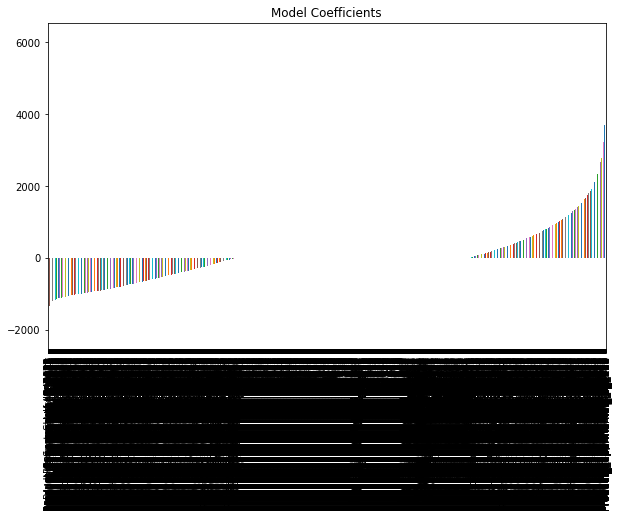

In [ ]:
predictors = [x for x in train_set.columns if x not in [label]+ No_Fit_Col]

# Call the algorithm, pass in the arguments and assign it to 'algorithm_1' variable
algorithm_1 = Ridge(alpha=3,normalize=True)

# Use the modelfit function we created ealier and its parameters.
modelfit(algorithm_1, train_set, test_set, predictors, label, No_Fit_Col, 'SubmissionFile.csv')

# This might take a while to run, to improve your model, you might try reducing the alpha a little (around 2, it will cause longer training time)

Using RandomForestRegressor algorithm...


n_estimators is the number of trees in the forest. Higher number of trees ensures that the model doesn't overfit the data, 
... it also increases model's complexity and ability to underfit the data.
max_depth is the maximum depth of the tree. Higher number also increases model's complexity
min_samples_leaf is the minimum number of samples required to be at a leaf node; higher min_samples_leaf penalizes unwanted features, and reduces model's complexity.
The number of jobs to run in parallel for both fit and predict.

In [ ]:


# Call the algorithm, pass in the arguments and assign it to 'algorithm_2' variable
algorithm_2 = RandomForestRegressor(n_estimators=500,max_depth=10, min_samples_leaf=80,n_jobs=6)

# Use the modelfit function we created ealier and its parameters.
modelfit(algorithm_2, train_set, test_set, predictors, label, No_Fit_Col, 'SubmissionFile1.csv')

# Optional
#coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
#coef6.plot(kind='bar', title='Feature Importances')


# I found out that you can imorove your RMSE by reducing the min_samples_leaf, but be careful, you might run the risk of overfitting,...
# ... with too much reduction (typically below 50 is a bad idea), because higher min_samples_leaf penalizes unwanted features, and reduces model's complexity.



Model Report
RMSE : 2862
CV Score : Mean - 2921 | Std - 215.8 | Min - 2536 | Max - 3341


C:\Users\PC\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Check your 'SubmissionFile1.csv' or 'SubmissionFile.csv' for your predictions. You mgiht want to get rid of 'Product_Identifier'...
... and 'Supermarket_Identifier' columns if you are working on the predictions and you want to submit it to Kaggle (based of their sample submission pattern)

Yay! You made it. This comes the end of our tutorial. I hope you enjoyed it like I did. If this tutorial helped you alot you can give a shout out on Twitter @nerdCyberArtist. Also if you ask any questions you can reach me too.